### <p style="text-align: right;"> &#9989; Macy Boren

# __MATH323 &ndash; Introduction to Numerical Analysis &ndash; Fall 2023__

# Programming Assignment 2


In this programming assignment, you will use your programming skills to compute approximations of different quantities and investigate their errors. This gives you the opportunity to assess your understanding at this point in the course. If you need help, please come see me. I am here to support you! 

## Goals

### By the end of this assignment you will have practiced several topics, including:

1. solving linear systems 
2. the condition number of a matrix
3. the Lagrange interpolation and its error term
4. the clamped cubic spline interpolation


## Instructions

You have three weeks to complete this programming assignment. You are required to use LaTeX and Python to answer the questions. The procedure to submit this assignment is available in the Jupyter notebook `slides_review_basics_programming` in Canvas and is mandatory. Note that no late assignment will be accepted. 

Work through the following assignment, making sure to follow all the directions and answer all the questions.

**This assignment is due at 3:00 p.m. Wednesday, Oct 11 on Canvas.**

## Grading

* Part 0: Preliminary (1 point)
* Part 1: Vandermonde matrix (14 points)
    * Question 1 (6 points)
    * Question 2 (2 points)
    * Question 3 (4 points)
    * Question 4 (2 points)
* Part 2: Lehmer matrix (14 points)
    * Question 1 (4 points)
    * Question 2 (6 points)
    * Question 3 (4 points)
* Part 3: Runge phenomenon (15 points)
    * Question 1 (1 point)
    * Question 2 (8 points)
    * Question 3 (3 points)
    * Question 4 (3 points)
* Part 4: Clamped cubic splines (22 points)
    * Question 1 (9 points)
    * Question 2 (5 points)
    * Question 3 (8 points)

Total points: **66**
___
___

## Part 0: Preliminary (1 point)

**Question 1**

Import in the cell below all the modules that you will need in this assignment.

In [1]:
import numpy as np
from numpy import linalg
from scipy.linalg import lu_factor,lu_solve
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

## Part 1: Vandermonde matrix (14 points)

In this part, we investigate the condition number of the Vandermonde matrix 

\begin{equation*}
    \begin{bmatrix}
        1 & x_0 & x_0^2 & \dots & x_0^n \\
        1 & x_1 & x_1^2 & \dots & x_1^n \\
        \vdots & & \\
        1 & x_n & x_n^2 & \dots & x_n^n 
    \end{bmatrix}
\end{equation*}

Here we consider the nodes $x_i = \frac{i}{n}$ for $i=0,1,\dots,n$.

**Question 1**

Create your own function called `vandermonde_matrix` that computes the $(n+1)\times (n+1)$ Vandermonde matrix. The input of the function is the degree $n$ of the polynomial we seek and the output is the matrix.

In [2]:
def vandermonde_matrix(n):
    A = np.zeros((n+1,n+1))

    #fill
    for i in range(n+1):
        for j in range(n+1):
            x_i = i/n
            A[i,j] = x_i ** j
            A[i,0] = 1
    return A


**Question 2**

Verify your function `vandermonde_matrix`. Provide numerical evidences that your function is verified.

In [3]:
vander_matrix = vandermonde_matrix(4)

#Hardcode this matrix is a computed vandermonde_matrix (5x5)
matrix = ([1,0,0,0,0],
          [1,1/4,1/16,1/64,1/256],
          [1,1/2,1/4,1/8,1/16],
          [1,3/4,9/16,27/64,81/256],
          [1,1,1,1,1])

norm_matrix = linalg.norm(matrix)
norm_vander = linalg.norm(vander_matrix)
print('Normalization of a 5x5 vandermonde matrix:',norm_matrix)
print('Normalization of a 5x5 vandermonde matrix using the definition:',norm_vander)
print('Difference between normalizations: ',norm_matrix - norm_vander)


Normalization of a 5x5 vandermonde matrix: 3.2489528436217916
Normalization of a 5x5 vandermonde matrix using the definition: 3.2489528436217916
Difference between normalizations:  0.0


**Question 3**

For $n=1,2,\dots, 100$, do the following 
- build the $(n+1)\times (n+1)$ Vandermonde matrix; 
- compute the condition number of the matrix and store it in the vector `cond_vandermonde`

In [4]:
cond_vandermonde = np.zeros(100)

for n in range(1,100):
    v_matrix = vandermonde_matrix(n) #build the vandermonde matrix
    k = np.linalg.cond(v_matrix)     #compute condition number
    cond_vandermonde[n] = k

**Question 4**

Plot the condition number of the Vandermonde matrix as a function of $n$. Comment and discuss the results.

_Hint:_ `plt.semilogy` could be useful


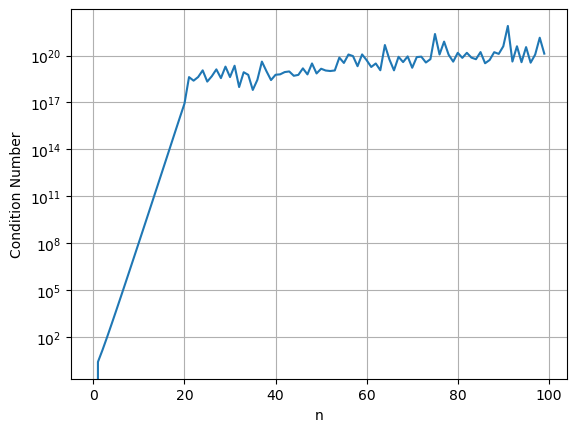

In [5]:
plt.grid(True, which ="both")
  
# Linear X axis, Logarithmic Y axis

plt.semilogy(cond_vandermonde)

plt.xlabel('n')
plt.ylabel('Condition Number')
plt.show()

<font size=6 color="#009600">&#9998;</font>  Even though the vandermonde matrix is invertable, which allows us to solve for a polynomial estimation, it is ill-conditioned. A matrix is well conditioned if K(A), the condition number, is close to 1 and ill-conditioned for a large K(A). A condition number is found by mulitplting the matrix, with the inverse. In the graph we have plotted the condition number from a 2x2 vandermode matrix to a 101x101 vandermode matrix. 

The data shows that as the matrix gets larger, so does the condition number. This is not a good estimation due to the increasing condition number. 

Building matrices changes the condition number due to the fact that it requires the inverse of a matrix and multiplying the matrices together. At n = 20 we see that the condition number will fluctuate as the matrices change because of the computation. 


## Part 2: Lehmer matrix (14 points)

The Lehmer matrix is defined as 

\begin{equation}
    M_{ij} = \left\{
    \begin{aligned}
        \frac{i}{j} &\,\, \mbox{ if } i \leq j, \\
        \frac{j}{i} &\,\, \mbox{ otherwise}.
    \end{aligned}
    \right.
\end{equation}

So it is a symmetric matrix in which all its diagonal components are equal to one.

**Question 1**

Create your own function called `lehmer_matrix` that computes the $n\times n$ Lehmer matrix. The input of the function is $n$ and the output is the matrix.

In [6]:
def lehmer_matrix(n):
    
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i<= j:
                m[i,j] = (i+1)/(j+1)

            else:
                m[i,j] = (j+1)/(i+1)
    return(m)

**Question 2**

For $n=10,20,30,\dots, 1000$, do the following 
- build the $n\times n$ Lehmer matrix; 
- compute the right-hand side vector $\mathbf{b}$ with $b_i = \displaystyle\sum_{j=1}^{n} M_{ij}$;
- solve the system $M\mathbf{x} = \mathbf{b}$ using `lu_factor` and `lu_solve`;
- compute the norm of the right-hand side and residual vectors in the maximum norm, and store them in two vectors `norm_b` and `norm_res`.

In [7]:
count = 0
norm_b = np.zeros(100)
norm_res = np.zeros(100)
#initialize it 
for n in range(10,1001,10):
    matrix = lehmer_matrix(n)
    
    B = np.zeros((n,1))
    for i in range(n):
        B[i] = np.sum(matrix[i])
        
    lu, piv = lu_factor(matrix)
    x = lu_solve((lu, piv), B)
    
    norm_b[count] = linalg.norm(B) #Initilize and store
    norm_res[count] = linalg.norm(B - (matrix * x))
    count  += 1

**Question 3**

**Without computing the exact solution**, comment on the quality of the approximations. Provide numerical evidences of your claims. 

In [8]:
# Put your code here 
k = np.linalg.cond(lehmer_matrix(10))
print('For a 10x10 lehmer matrix, the condition number is: ',k)

k = np.linalg.cond(matrix)
print('For a large 100x100 lehmer matrix, the condition number is: ',k) # The largest matrix has a very large condition number.

for i in [10,20,50,99]:
    print(f'The normalization of a residual vector for an {i}x{i} matrix is: {norm_res[i]}')

For a 10x10 lehmer matrix, the condition number is:  86.38931620332272
For a large 100x100 lehmer matrix, the condition number is:  1074848.2498488487
The normalization of a residual vector for an 10x10 matrix is: 6255.81423002011
The normalization of a residual vector for an 20x20 matrix is: 22824.872492400336
The normalization of a residual vector for an 50x50 matrix is: 134714.5611507002
The normalization of a residual vector for an 99x99 matrix is: 518058.1825503887


<font size=6 color="#009600">&#9998;</font>  
To solve this problem, we are required to solve for a Lehmer matrix of varying sizes. Then we have enough information to solve for x vector and find the normalization of b and the residual. The residual is $r = b - Ax$ which shows us if there is anything left over due to round off error. The x vector in this case is not exact but is only an estimation.

We can see this by taking a look at some information. If we were to find the condition number of matrix A we would see that it is very high. Recall that a condition number closer to 1 means that it is well condition and one greater is ill-conditioned. At a 10x10 lehmer matrix the condition number is about 86 and with a 1000x1000 matrix, the condtion number is about 1,074,848. The greater the matrix the more ill-conditioned it becomes. 

This is also confirmed by the normalization of the residual vector. To know that the solution is accurate, the norm of the residual vector should be very close to 0. We know this because $b - Ax = 0$, if done properly. But this is not the case. We see that the norm is getting larger which means the estimation is very inaccurate, and the estimation of x is not good. 

## Part 3: Runge phenomenon (15 points)

Consider the function 

$$f(x) = \frac{1}{1+25x^2}$$ 

We want to approximate this function on the interval $x\in[-1,1]$ using the Lagrange interpolation. 

**Question 1**

Create your function called `f` that computes the values of $f(x)$ for a given set of nodes. The input is a vector containing the nodes and the output is a vector containing the values of the function $f(x)$. 

In [9]:
def f(nodes):
    f_x = np.zeros(len(nodes))
    
    for x in range(len(nodes)):
        f_x[x] = 1 / (1 + 25*(nodes[x] ** 2))
    return(f_x)

nodes_vector = np.array([-1,0,1])
f_x = f(nodes_vector)
print(f_x)

[0.03846154 1.         0.03846154]


**Question 2**

Add the command line `from scipy.interpolate import lagrange` in **Part 0**. Using the Lagrange interpolation function of SciPy, compute the Lagrange interpolant of degree $6$, $8$, $10$ and $12$. Here we consider the nodes $x_i = -1 + 2 \frac{i}{n}$ for $i=0,1,\dots,n$. Plot the different interpolants and the function $f(x)$ on the interval $[-1,1]$ in the same figure. 

_Hint:_ the function `linspace` of NumPy could be useful


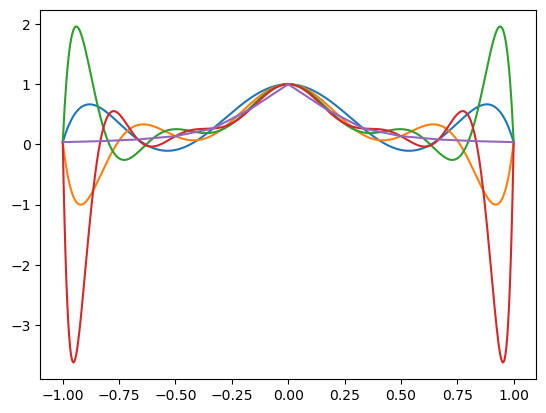

In [10]:
for n in ([6,8,10,12]):
    x_arr = np.zeros(n+1)
    
    for x in range(0,n+1):
        x_arr[x] = -1 + (2*x)/n
    x = x_arr
    y = f(x)
    poly = lagrange(x,y) #need to figure out what to plot, and Increase points
    #print(type(poly))

    x_1 = np.linspace(-1,1,500)
    plt.plot(x_1,poly(x_1))
    
plt.plot(x,y) #the function
plt.show()


**Question 3**

Repeat **Question 2** but this time with the Chebyshev nodes 

$$x_i = \cos(\gamma_i), \quad \gamma_i = \frac{(2i+1)\pi}{2(n+1)}$$ 

for $i=0,1,\dots,n$. To do so, create a function called `chebyshev_nodes` that computes the Chebyshev nodes for a given $n$.

In [11]:
def chebyshev_nodes(n):
    x_array = np.zeros(n)
    for i in range(n):
        gamma = ((2*i + 1)*np.pi)/(2*(n+1))
        x_array[i] = np.cos(gamma)
    return(x_array)

x = chebyshev_nodes(3)
print(x)

[ 0.92387953  0.38268343 -0.38268343]


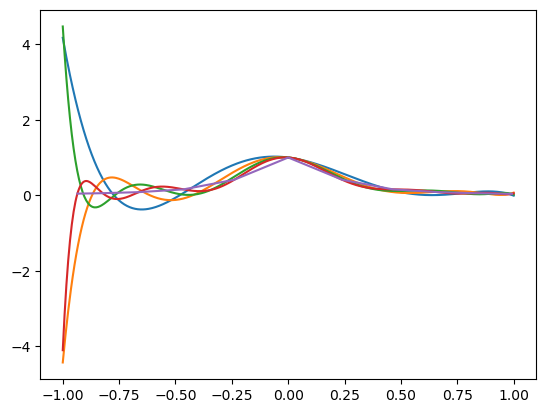

In [12]:
# Put your code here for n in ([6,8,10,12]):
for n in ([6,8,10,12]):
    x_arr = np.zeros(n+1)
        
    x = chebyshev_nodes(n)
    y = f(x)
    poly = lagrange(x,y) #need to figure out what to plot
    
    x_1 = np.linspace(-1,1,500)
    plt.plot(x_1,poly(x_1))

plt.plot(x,y) #the function
plt.show()


**Question 4**

Comment and discuss the results of **Question 2** and **Question 3**.

<font size=6 color="#009600">&#9998;</font>  Runges Phenomenon is the observation that with some estimations, an oscilation of points around the ends of the function occur. 

In question 2, we are asked to estimate the function with nodes $x_i = -1 + 2 \frac{i}{n}$. This causes significate oscilations at the ends. We see that as the degree increases, more oscilation occur. This goes to show that higher deegress do not mean improved accuracy in some cases. In class we also saw that increasing the number of equidistant points also contributes to this phenomenon. We are not always given a large number of points to base our estimation off of so this is not always reliable. 
Looking at the degrees, if we wanted to take the derivative, we would see that the function would grow quickly as n increases. Taking the derivative is an important tool when estimating a function around the end points.

In question 3, we use differnt nodes to hopefully improve our estimation. Chebyshev nodes $x_i = \cos(\gamma_i), \quad \gamma_i = \frac{(2i+1)\pi}{2(n+1)}$ provide a better estimation. They are still inaccurate at the start of the estimation but are improved at the end. 

## Part 4: Clamped cubic splines (22 points)

In this part, you will code **your own function** that computes a clamped cubic spline. We consider the interval $[0,1]$ and the nodes are $x_i = \frac{i}{n}$ for $i=0,1,\dots,n$ so we have $h_i = x_i-x_{i-1} = h = \frac{1}{n}$.

**Question 1**

Create a **function** called `compute_clamped_cubic_spline_coefficients` that computes the coefficients $a_i$, $b_i$, $c_i$ and $d_i$ for $i=0,1,\dots,n$. The four inputs of the function are the value of $h$, a vector containing the values $f(x_i)$ for $i=0,1,\dots,n$, and the boundary conditions $f'(0)$ and $f'(1)$.

The code to compute the natural spline's coefficients in the slides named _Polynomial Interpolation Part 2_ on Canvas is a good starting point. You should **modify the code below** for a clamped cubic spline. 


In [13]:
# Modify this code 
def compute_clamped_cubic_spline_coefficients(h, xi_values, f_der_0, f_der_1):
    n = len(xi_values) - 1

    # We solve the system to obtain the coefficient c

    #   define a 
    a = xi_values

    #   matrix
    M = np.zeros((n+1,n+1))
    M[0,0] = 1.0
    for i in range(1,n):
        M[i,i-1:i+2] = np.array([h*1.0, h*4.0, h*1.0])

    M[n,n-1] = h # Clamped 
    M[n,n] = 2 * h #Clamped

    #   right-hand side vector
    rhs = np.zeros(n+1)
    rhs[0] = 3*(a[i+1]-a[i])/h - 3 * f_der_0
    rhs[n] = 3 * f_der_1 - (3*(a[n] - a[n-1]))/h

    for i in range(1,n):
        rhs[i] = 3*(a[i+1] - 2*a[i] + a[i-1])

    #   solve the system 
    lu, piv = lu_factor(M)
    c = lu_solve((lu, piv), rhs)

    # Compute the coefficients b and d 
    b = np.zeros(n)
    d = np.zeros(n)
    for i in range(1,n+1):
        b[i-1] = h*(a[i]-a[i-1]) - h* (c[i]+2*c[i-1])/(3)
        d[i-1] = (c[i]-c[i-1])/(3*n)
        
    print('a =',a)
    print('b =',b)
    print('c =',c)
    print('d =',d)
    return a, b, c, d



**Question 2**

Create a function `clamped_cubic_spline_interpolation` that compute a clamped cubic spline and evaluate it at a given $x$. The inputs of your function are a vector containing the nodes $x_i$ for $i=0,1,\dots,n$, a vector containing the values of $f(x_i)$, the boundary conditions $f'(0)$ and $f'(1)$, and the value $x$.

You should use your function in **Question 1** to compute the coefficients of the clamped cubic spline.

In [14]:
# Put your function here 
def clamped_cubic_spline_interpolation(nodes_xi, xi_values, f_der_0, f_der_1, x):
    
    n = len(xi_values) - 1
    h = 1/n
    a, b, c, d = compute_clamped_cubic_spline_coefficients(h, xi_values, f_der_0, f_der_1)
    #print('a = ',a)
    #print('b = ',b)
    #print('c = ',c)
    #print('d = ',d)
    equation = np.zeros(n)
    
    for i in range(1,n):
        xi = x - xi_values[i]
        equation[i] = a[i] + b[i] * xi + c[i] * (xi ** 2) + d[i] * (xi ** 3)

        
    return equation

    

**Question 3**

Verify your function `clamped_cubic_spline_interpolation` by using the theoritical result we saw in the course about the clamped cubic spline. Provide numerical evidences that your function is verified. To do so, consider the function $f(x) = \sin(4\pi x)$, the node $x=1/3$ and $h = \frac{1}{2^k}$ for $k=1,2,\dots, 8$ to perform the tests.

In [15]:
# Put your code here 
f_der_0 = 4 * np.pi * np.cos(0)
f_der_1 = 4 * np.pi * np.cos(4 * np.pi * 1)
x = 1/3
f = np.sin(4*np.pi*x)

for k in range(1,9):
    h = 1 / (2**k)
    n = 2 ** k
    nodes_xi = np.zeros(n+1)    #will be a vec
    xi_values = np.zeros(n+1) #will be a vec
    f = np.sin(4*np.pi*nodes_xi)
    compute = clamped_cubic_spline_interpolation(nodes_xi, xi_values, f_der_0, f_der_1, x)
    print('h = ',h)
    print('clamped cubic spline interpolation estimation: ', compute)
    

a = [0. 0. 0.]
b = [12.56637061 -6.28318531]
c = [-37.69911184   0.          37.69911184]
d = [6.28318531 6.28318531]
h =  0.5
clamped cubic spline interpolation estimation:  [ 0.         -1.86168454]
a = [0. 0. 0. 0. 0.]
b = [ 5.57065914 -1.71654032  1.29550213 -3.46546818]
c = [-37.69911184   8.55031403   3.49785574 -22.54173698  86.66909218]
d = [ 3.85411882 -0.42103819 -2.16996606  9.10090243]
h =  0.25
clamped cubic spline interpolation estimation:  [ 0.          0.36226078  0.74011557 -3.32272304]
a = [0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = [ 2.72136686 -0.73034474  0.20001212 -0.06970372  0.07880277 -0.24550736
  0.90322667 -3.36739932]
c = [-37.69911184  10.08541898  -2.64256409   0.48483738   0.70321455
  -3.2976956   12.48756784 -46.65257578 174.12273526]
d = [ 1.99102212e+00 -5.30332628e-01  1.30308395e-01  9.09904871e-03
 -1.66704590e-01  6.57719310e-01 -2.46417265e+00  9.19897129e+00]
h =  0.125
clamped cubic spline interpolation estimation:  [ 0.          0.85751191 -0.22212129 

<font size=6 color="#009600">&#9998;</font>  This problem required us to modify a natural cubic spline interpolation for a clamped cubic spline interpolation. 

The first step is to incorperate the clamped boundary condition for the right hand side, as RHS[0] and RHS[n] which required the  use of $f'(0)$ and $f'(1)$. Then we are able to solve for C normally. In similar ways, we can the move on to solve for B and D with respects to h.

Once the coeficcents are solved for, we can use this definition to compute the clamed cubic spline interpolation estimation. This is done for all of the nodes of x and the x values from the given function. From there, we can solve for the estimation in the form $$p_i(x) = a_i + b_ix + c_ix^2 +d_ix^3 \quad \mbox{if} \quad x\in[x_{i-1},x_i].$$

In the test, we can see the code does not line up. From there we should get 8 numerical values that estimate the function. Once we have those values we can compare them to the actual function. Further more, we can calculate the relative and absolute errors from the clamped cubic spline interpolation and the given function. 


### Congratulations! It is done!

Please submit your assignment on Canvas following the procedure described in the Jupyter notebook `slides_review_basics_programming`.